In [241]:
#Chapter 4 - linear data structures 
#Discussion questions
from pythonds3.basic import Stack, Queue


In [36]:
#covert following values to binary using "divide by 2". Show the stack of remainders
def divide_by_base(num, base=2):
    rem_stack = Stack()
    while num > 0:
        rem = num % 2
        rem_stack.push(rem)
        num = num // 2
    
    # bin_str = ''
    # while not rem_stack.is_empty():
    #     bin_str += str(rem_stack.pop())
    return rem_stack._items

print(divide_by_base(17))
print(divide_by_base(45))
print(divide_by_base(96))

[1, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 1]


#### 2. convert the following infix expressions to prefix (using full parenthesis)
1. (A+B)*(C+D)*(E+F)
2. A+((B+C)*(D+E))
3. A*B*C*D+E+F

***

1. *+AB*+CD+EF 
2. +A*+BC+DE
3. *A*B*CD+E+F

#### 3. convert the above infix operations to postfix (using full parenthesis)
1. AB+CD+*EF+*
2. ABC+DE+*+
3. AB*C*D*E+F+


In [43]:
#4. convert above infix operations to postfix using direct conversion algorithm
def infix_to_postfix(exp):
    prec = {
    "(" : 1, 
    "+" : 2, 
    "-" : 2,
    "*" : 3, 
    '/' : 3,
    }
    stack = Stack()
    postfix = []
    brackets = '()'
    for char in exp:
        if char not in prec and char != ')':
            postfix.append(char)
        
        elif char == '(':
            stack.push(char)
        
        elif char == ')':
            top = stack.pop()
            while top != '(':
                postfix.append(top)
                top = stack.pop()
        
        else:
            # >= for comp here 
            while not stack.is_empty() and prec[stack.peek()] >= prec[char]:
                postfix.append(stack.pop())
            stack.push(char)

    #add remaining operators
    while not stack.is_empty():
        postfix.append(stack.pop())
    return ''.join(postfix)
            
print(infix_to_postfix('(A+B)*(C+D)*(E+F)'))
print(infix_to_postfix('A+((B+C)*(D+E))'))
print(infix_to_postfix('A*B*C*D+E+F'))


        

AB+CD+*EF+*
ABC+DE+*+
AB*C*D*E+F+


In [49]:
#Evaluate the following postfix expressions, show the stack as each operator and operand is processed
def do_operation(operator, operand_1, operand_2):
    assert operator in '+/-*'
    return eval(f'{operand_1} {operator} {operand_2}')

def evaluate_postfix(postfix_exp):
    operand_stack = Stack()
    operators = '+-*/'
    for token in postfix_exp:
        if token not in operators:
            operand_stack.push(token)
        else:
            operand_2 = operand_stack.pop()
            operand_1 = operand_stack.pop()
            res = do_operation(token, operand_1, operand_2)
            operand_stack.push(res)
    
    assert operand_stack.size() == 1
    return operand_stack.pop()

print(evaluate_postfix('23*4+'))
print(evaluate_postfix('12+3+4+5+'))
print(evaluate_postfix('12345*+*+'))


10
15
47


#### 6. The alternative implementation of the Queue ADT is to use a list such that rear of the queue is the end of the list. What would this mean for big-O performance

 enqueue - if rear of queue is at the end of list then enqueue would be a O(1) operation, as it equates to append, versus
 current O(n) complexity given the current insert(0, item) implementation.
 ***
 dequeue - if rear of queue is at the end of list then dequeue would be a O(n) operation, as it equates to .pop(0), versus
 current O(1) complexity given current .pop() implementation. 
 ***
 .size() and .is_empty() operations are not affected



#### What is the result of carrying out both steps of the linked list add method in reverse order? What kind of reference results? What types of problems may result?

def add(self, item): <br>
> temp = Node(item) <br>
> temp.set_next(self.head) **step 1** <br>
> self.head = temp **step 2** <br>

if both steps are carried out in reverse order, step 1 means *self.head* will be set to *temp*, but as *temp*'s next == None, the original references to the linked list will be gone. Then step 2 setting *temp*'s next as *self.head* (which is temp), will lead to a circular reference to temp object itself. If other methods such as search, append, or index which require list traversal are called, it could lead to an infinite loop.

#### 8.Explain how the linked list remove method works when the item to be removed is in the last node.

When the item to be removed is the last node, the remove method will through the whole list, arriving at the final node setting the reference current to be itself and reference previous to second to last node. The previous.next will then be set to current.next which is None, making previous the new final node, thus removing the final node.

#### 9. Explain how the remove method works when the item is in the only node in the linked list.

When the item is the only node in the linked list, current.data == item will be immediate and thus the while loop for list traversal will not occur. At this stage, because previous **is None**, self.head will be set to current.next, which **== None**, thus resulting in an empty list.

In [222]:
#Programming Exercises Chapter 4.27.
#1. modify the infix-to-postfix algorithm so that it can handle errors 
""" possible errors:
1. invalid tokens 
2. consecutive operands/operators
3. unclosed brackets
4. Invalid number of operands/operators
"""

def infix_to_postfix(infix_expr):
    prec = {}
    prec['**'] = 4
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1

    def token_type(token):
        #1
        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + "0123456789" + 'ANS':
            return 'operand'
        elif token in '()':
            return 'bracket'
        elif token in prec:
            return 'operator'
        else:
            raise Exception(f'Invalid Token: "{token}"')

    def check_expression(exp):
        #4
        operators = 0
        operands = 0
        for token in exp:
            if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + "0123456789" + 'ANS':
                operands += 1
            if token in prec:
                operators += 1
        if operators != operands - 1:
            raise Exception('Missing operators/operands')
    

    op_stack = Stack()
    postfix_list = []
    token_list = infix_expr.split()
    token_list = list(map(lambda t: t.upper(), token_list))

    for i,token in enumerate(token_list):
        #2. consecutive operands/operators
        if i > 0:
            if token_type(token) == token_type(token_list[i-1]) and token_type(token) != 'bracket':
                raise Exception(f'Consecutive {token_type(token)}s')

        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + "0123456789" + 'ANS':
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            #3
            if op_stack.is_empty():
                raise Exception('Unclosed Bracket')

            top_token = op_stack.pop()
            while top_token != "(" and not op_stack.is_empty():
                postfix_list.append(top_token)
                top_token = op_stack.pop()

            if top_token != '(':
                raise Exception('Unclosed Bracket')
        else:

            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    check_expression(postfix_list)

    return " ".join(postfix_list)

print(infix_to_postfix('( ( b + c ) )'))

B C +


In [232]:
#2. Modify the postfix evaluation algorithm so that it can handle errors.
""" 
possible errors:
1. check that final size of operand stack is 1, or else there is an error in the expression
"""
def int_test(s):
    try:
        int(s)
        return True 
    except ValueError:
        return False 

def postfix_eval(postfix_expr, prev_ans=None):
    operand_stack = Stack()
    token_list = postfix_expr.split()

    if 'ANS' in token_list and prev_ans is None:
        raise RuntimeError('ANS used but no previous answer stored.')

    if prev_ans is not None:
        token_list = map(lambda x: x if x != 'ANS' else prev_ans, token_list)

    for token in token_list:
        if int_test(token):
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            try:
                result = eval(f"{operand1} {token} {operand2}")
            except ZeroDivisionError:
                print('Division by zero!')
                return None
                
            operand_stack.push(result)
    
    if operand_stack.size() != 1:
        raise Exception('Invalid expression')
    return operand_stack.pop()


In [233]:
#Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion 
# and the postfix evaluation algorithm. 
# Your evaluator should process infix tokens from left to right and use two stacks, 
# one for operators and one for operands, to perform the evaluation.
def direct_infix_evaluator(expression, prev_ans=None):
    postfix = infix_to_postfix(expression)
    result = postfix_eval(postfix, prev_ans)
    return result

direct_infix_evaluator('3 ** 2')

9

In [235]:
#Turn your direct infix evaluator from the previous problem into a calculator.

def calculator():
    #take input and run direct_infix_evaluator
    run = True
    i = 0
    while run:
        if i == 0:
            prev_ans = None 
            print('(Submit EXIT to exit)')
            print('(If you would like to use the previous result please use ANS as a variable)')

        print('Please enter an expression: ')
        exp = input()
        if exp == 'EXIT':
            break 
        try:
            ans = direct_infix_evaluator(exp, prev_ans) 
            print(f'{exp} = {ans}')
            prev_ans = ans
        except Exception as e:
            print('ERROR: ' + str(e))
        
        i += 1
    print('**** Calculator Closing! ****')
calculator()



(Submit EXIT to exit)
(If you would like to use the previous result please use ANS as a variable)
Please enter an expression: 
1 + 2 = 3
Please enter an expression: 
ANS * 9 = 27
Please enter an expression: 
ANS * 3 = 81
Please enter an expression: 
**** Calculator Closing! ****


In [19]:
#5. Implement the Queue ADT, using a list such that the rear of the queue is at the end of the list.

class Queue_2:
    def __init__(self):
        self._items = []
    def enqueue(self, item):
        self._items.append(item)
    def dequeue(self):
        return self._items.pop(0)
    def is_empty(self):
        return not bool(len(self._items))
    def size(self):
        return len(self._items)

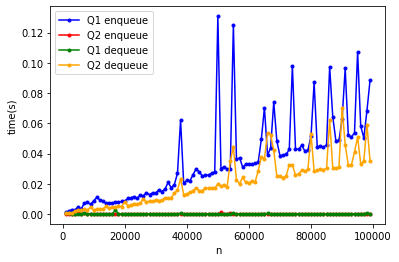

In [248]:
# Design and implement an experiment to 
# do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?
#First compare 
from timeit import Timer
import matplotlib.pyplot as plt
X = []
Y1 = []#Queue enqueue
Y2 = [] #Queue2 enqueue
Y3 = []
Y4 = []
number = 1000
for size in range(1000, 100_000, 1_000):
    x1 = Queue()
    x2 = Queue_2()
    x1._items = list(range(size))
    x2._items = list(range(size))
    t1 = Timer(f"x1.enqueue(1)", "from __main__ import x1")
    t2 = Timer(f"x2.enqueue(1)", "from __main__ import x2")
    Y1.append(t1.timeit(number=number))
    Y2.append(t2.timeit(number=number))
    x1._items = list(range(size))
    x2._items = list(range(size))
    t3 = Timer(f"x1.dequeue()", "from __main__ import x1")
    t4 = Timer(f"x2.dequeue()", "from __main__ import x2")
    Y3.append(t3.timeit(number=number))
    Y4.append(t4.timeit(number=number))
    X.append(size)

plt.plot(X, Y1, color='blue', marker='.', label='Q1 enqueue')
plt.plot(X, Y2, color='red', marker='.', label='Q2 enqueue')
plt.plot(X, Y3, color='green', marker='.', label='Q1 dequeue')
plt.plot(X, Y4, color='orange', marker='.', label='Q2 dequeue')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()


## Comparison of Queue and Queue_2
The difference in implementation of Queue and Queue_2 (rear of queue either at start or end of list) results in the complexity of enqueue and dequeue to be swapped for the respective ADTs. In Queue, where the rear of the list was the front, enqueue would be equivalent to insert(0, item), which is a O(n) operation. This would be equivalent to dequeue in Queue_2 which is pop(0), which is also O(n). This is seen in the plot in the blue and orange lines. In Queue, dequeue is equivalent to pop(), an O(1) operation, of which it's time complexity is equivalent to Queue_2's enqueue, append(item), which is also O(1). Other operations in size and is_empty are the same.

In [8]:
#7.It is possible to implement a queue such that both enqueue and dequeue have 𝑂(1) performance on average. 
# In this case it means that most of the time enqueue and dequeue will be 𝑂(1) except in one particular circumstance 
# where dequeue will be 𝑂(𝑛). Create an implementation of a queue that would have an average performance of 𝑂(1) for 
# enqueue and dequeue operations.

#Linked list seems to fit here?
class Node:
    def __init__(self, val=None, _next=None):
        self.val = val
        self._next = _next

class Queue_3:
    def __init__(self):
        self.head = None 
        self.tail = None 
        self.size = 0
        #rear of queue is head of linked list
    def enqueue(self, item):
        node = Node(item)
        if self.size == 0:
            self.head = node 
            self.tail = node 
        elif self.size >= 1:
            self.tail._next = node 
            self.tail = node
        self.size += 1

    def dequeue(self):
        if self.size == 0:
            print('Queue is Empty')
            return None
        
        if self.size > 1:
            new_head = self.head._next
            removed = self.head 
            self.head = new_head
            self.size -= 1
        else:
            removed = self.head 
            self.head = None
            self.tail = None 
        return removed.val


queue = Queue_3()
queue.enqueue(3)
queue.enqueue(2)
queue.enqueue(1)
assert queue.dequeue() == 3
assert queue.dequeue() == 2
assert queue.dequeue() == 1
assert queue.head == None and queue.tail == None

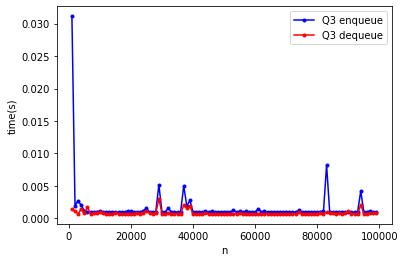

In [7]:
from timeit import Timer
import matplotlib.pyplot as plt
import random
X = []
Y1 = []#Queue3 enqueue
Y2 = [] #Queue3 dequeue
number = 1_000
for size in range(1_000, 100_000, 1_000):
    x1 = Queue_3()
    for _ in range(size):
        x1.enqueue(random.random())

    t1 = Timer(f"x1.enqueue(random.random())", "from __main__ import x1, random")
    Y1.append(t1.timeit(number=number))
    t2 = Timer(f"x1.dequeue()", "from __main__ import x1")
    Y2.append(t2.timeit(number=number))
    X.append(size)

plt.plot(X, Y1, color='blue', marker='.', label='Q3 enqueue')
plt.plot(X, Y2, color='red', marker='.', label='Q3 dequeue')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

In [55]:
#Consider a real life situation. Formulate a question and then design a simulation that can help to answer it. 
#Grocery Store Checkout 
class Customer:
    def __init__(self, time, avg_basket_size=20, avg_item_duration=3, cash_duration=3, card_duration=1,
    payment=None):
        self.timestamp = time 
        #basket size
        self.basket_size = (1 - random.gauss(0, 1)) * avg_basket_size
        self.payment_method = payment
        self.payment_duration = cash_duration if self.payment_method == 'cash' else card_duration
        self.basket_duration = self.basket_size * (1-random.gauss(0,1)) * avg_item_duration + self.payment_duration

    def get_stamp(self):
        return self.timestamp
    
    def get_basket(self):
        return self.basket_duration

    def get_payment_method(self):
        return self.payment_method

    def wait_time(self, current_time):
        return current_time - self.timestamp


In [82]:
class PaymentTill:
    def __init__(self, max_dps=3, payment_method=None):
        self.payment_method = payment_method
        self.max_dps = max_dps
        self.dps = self.get_dps()
        self.current_customer = None 
        self.time_remaining = None 
    
    def get_dps(self):
        if self.payment_method == 'card':
            return self.max_dps 
        else:
            return random.uniform(0.5, 1) * self.max_dps 

    def tick(self):
        if self.current_customer is not None:
            self.time_remaining = self.time_remaining - self.dps
            if self.time_remaining <= 0:
                self.current_customer = None 
    
    def busy(self):
        return self.current_customer is not None 
    
    def start_next(self, new_customer):
        self.current_customer = new_customer
        self.time_remaining = new_customer.get_basket()

In [83]:
class PaymentArea:
    def __init__(self, n_cash, n_card, max_dps):
        self.cash_payments = [PaymentTill(max_dps=max_dps)] * n_cash 
        self.card_payments = [PaymentTill(max_dps=max_dps)] * n_card 

    def tick(self):
        for cash in self.cash_payments:
            cash.tick()
        for card in self.card_payments:
            card.tick()

    def start_free_till(self, customer):
        if customer.get_payment_method() == 'cash':
            for cash in self.cash_payments:
                if not cash.busy():
                    cash.start_next(customer)
                    return True 
        elif customer.get_payment_method() == 'card':
            for card in self.card_payments:
                if not card.busy():
                    card.start_next(customer)
                    return True
        
        return False 


In [84]:
class SimQueue(Queue_2):
    def __init__(self):
        super().__init__()
    
    def peek(self):
        return self._items[0]

In [128]:
def spawn_customer(spawn_rate):
    #spawn_rate per minute 
    num = random.randint(1, 60//spawn_rate)
    return num == 60//spawn_rate

def customer_payment(customer_cash_prob):
    if random.uniform(0, 1) < customer_cash_prob:
        return 'cash'
    return 'card'

def simulation(run_time=3600, 
avg_basket_size=20, avg_item_duration=4, cash_duration=3, card_duration=1, 
max_dps=3, n_cash=3, n_card=3, customer_spawn_rate=5, customer_cash_prob=0.25):
    #run time in seconds 
    queue = SimQueue()
    payment_area = PaymentArea(n_cash, n_card, max_dps)
    waiting_times = []

    for current in range(run_time):
        if spawn_customer(customer_spawn_rate):
            customer = Customer(current, avg_basket_size=avg_basket_size, avg_item_duration=avg_item_duration,
            cash_duration=cash_duration, card_duration=card_duration, payment=customer_payment(customer_cash_prob))
            
            queue.enqueue(customer)
        
        if not queue.is_empty():
            #check current customer's payment method 
            next_customer = queue.peek()
            started = payment_area.start_free_till(next_customer)
            if started:
                queue.dequeue()
                waiting_times.append(next_customer.wait_time(current))
        
        payment_area.tick()
        
    average_wait = sum(waiting_times)/len(waiting_times)
    return average_wait, queue.size()
                

Text(0.5, 1.0, 'customers remaining (n)')

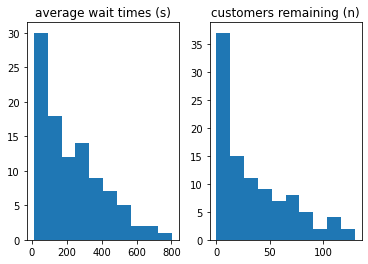

In [131]:
avg_wait_times = []
customers_remaining = []
for _  in range(100):
    wait_times, remaining = simulation(3600)
    avg_wait_times.append(wait_times)
    customers_remaining.append(remaining)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(avg_wait_times)
ax2.hist(customers_remaining)
ax1.set_title('average wait times (s)')
ax2.set_title('customers remaining (n)')


The above simulation is of a grocery store payment till, to see how different configurations affect customer wait times. The configurations include:

    - avg_basket_size: determines average basket size in a gaussian distribution 
    - avg_item_duration: how long it takes on average to process an item - to introduce variability to customer processing time - also a gaussian distribution 
    - cash_duration: duration in secs/ticks it takes to process the payment of the basket if cash payment 
    - card_duration: duration in secs/ticks it takes to process the payment of the basket if card payment - typically less than card_duration 
    - max_dps: max basket duration that can be consumed by each tick at the till. For card tills the max_dps is always used (assumed self checkout is more efficient), where as cash tills because of human processing there is a level of variability introduced, where till can be up to 50% slower than card till 
    - n_cash: number of cash tills at payment area 
    - n_card: number of card tills at payment area 
    - customer_spawn_rate: customer spawned per minute on average 
    - customer_cash_prob: proportion of customers that use cash payment 

Different experimental conditions can also be modelled such as creating a second cash cue that cash customers can move to to prevent blockage. How does increasing the speed of cash vs card tills affect speed? Including simulation of incidents such as misscanned items at card tills which introduces delays, etc! 

In [158]:
#Modify the Hot Potato simulation to allow for a randomly chosen counting value so that each pass is not predictable from the previous one.
def modified_hot_potato(name_list, max_num=10):
    sim_queue = Queue()
    for name in name_list:
        sim_queue.enqueue(name)

    while sim_queue.size() > 1:
        #randomly generate num
        num = random.randint(1, max_num)
        for _ in range(num):
            sim_queue.enqueue(sim_queue.dequeue())

        sim_queue.dequeue()

    return sim_queue.dequeue()

In [159]:
modified_hot_potato(['bill', 'bob', 'jack', 'jill', 'joe', 'edan', 'holly'])

'edan'

In [ ]:
#Implement a radix sorting machine 
def radix_sort(nums):
    pass
